# Template Notebook

## Setup

### Standard library imports

In [1]:
%load_ext autoreload

In [2]:
import sys
import warnings
import logging

sys.path.append('..')
warnings.filterwarnings('ignore')
logger = logging.getLogger(__name__)

In [12]:
%autoreload 2

import numpy as np
import pandas as pd
import seaborn as sns
import plotly.express as px
from matplotlib import pyplot as plt

from source.spea_optimizer import SPEAOptimizer

In [4]:
sns.set()

### Setup objective function

In [5]:
def schaffer_function(x):
    return [x**2, (x - 2)**2]

In [6]:
optimzier = SPEAOptimizer(
    schaffer_function,
    n_dim=1,
    mode="min",
    mutation_operator="gaussian",
    crossover_operator="center",
    selection_operator="binary_tournament",
    clustering_method="affinity_propagation"
)

In [21]:
history = optimzier.optimize(
    generations=1000,
    population_size=20,
    crossover_rate=0.8,
    mutation_rate=0.8,
    reducing_period=1,
    search_range=((-10_000, 10_000),),
    mutation_strength=10,
    clustering_parameters={"max_iter": 50},
    silent=False,
    logging=True,
    logging_path="../data/schaffer_f1_logs.csv"
)

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:35<00:00, 28.06it/s]


In [22]:
optimzier.pareto_front.shape

(4, 1)

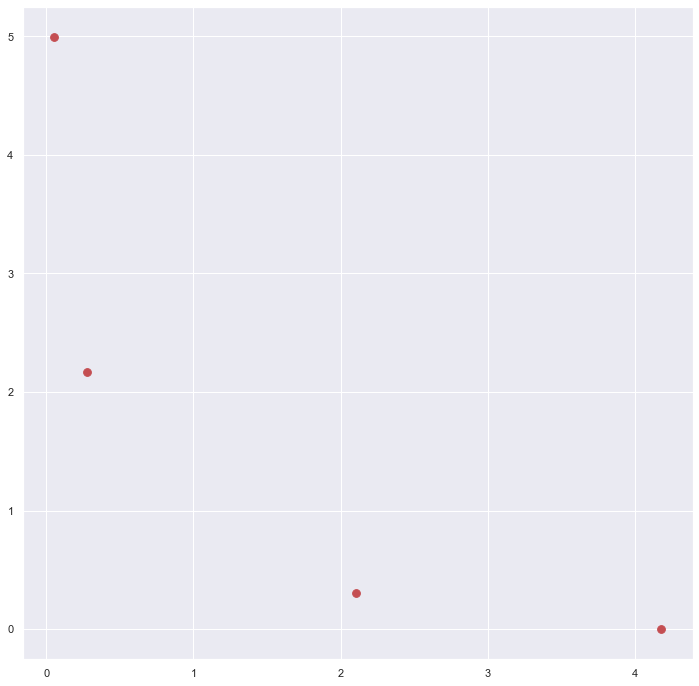

In [23]:
plt.figure(figsize=[12, 12])

values = np.apply_along_axis(schaffer_function, 0, optimzier.pareto_front)
plt.scatter(values[0, :], values[1, :], c="r", s=60)

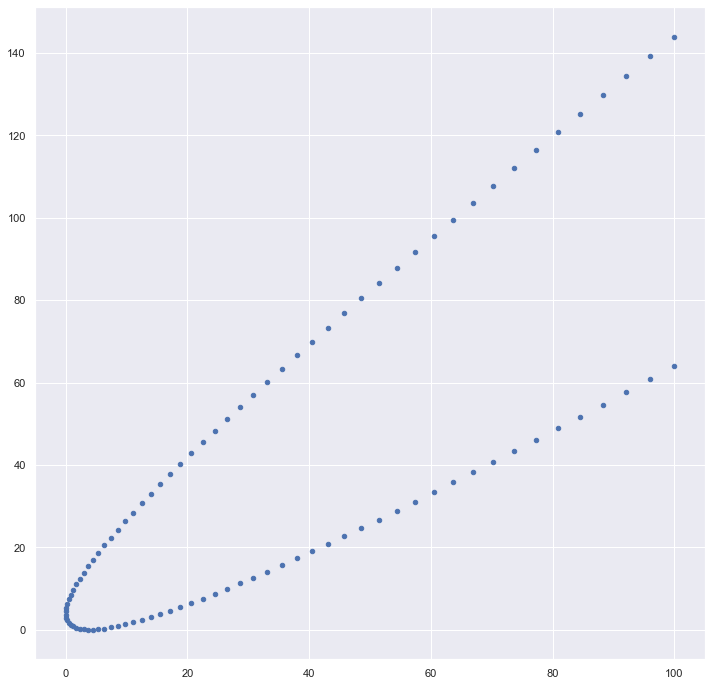

In [24]:
plt.figure(figsize=[12, 12])

t = np.linspace(-10, 10, 100)
t_values = np.apply_along_axis(schaffer_function, 0, t)
plt.scatter(t_values[0, :], t_values[1, :], c="b", s=20)

In [25]:
logs_df = pd.read_csv(r"../data/schaffer_f1_logs.csv")

In [29]:
logs_df.loc[logs_df["generation"] == 999]

,X,x,y,generation,pareto
21991,-6.789202,46.093264,77.250072,999,False
21992,12.805612,163.983708,116.761259,999,False
21993,-31.554722,995.700500,1125.919389,999,False
21994,1.450663,2.104423,0.301771,999,False
21995,-7.388901,54.595860,88.151465,999,False
21996,0.528232,0.279029,2.166100,999,False
21997,2.053487,4.216811,0.002861,999,False
21998,-0.234218,0.054858,4.991728,999,False
21999,2.173141,4.722543,0.029978,999,False
22000,-0.784714,0.615777,7.754634,999,False
